# Shakes Data Analysis Workflow

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD&api_foundry=true'

In [3]:
from urllib.request import urlretrieve
urlretrieve(URL,'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x10aa1d588>)

In [4]:
import pandas as pd
data=pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.head()


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


<AxesSubplot:xlabel='Date'>

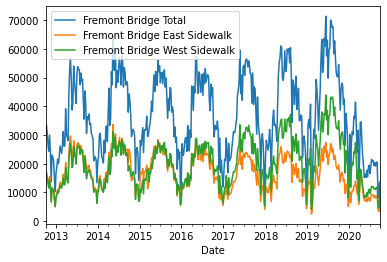

In [5]:
%matplotlib inline
data.resample('W').sum().plot()

In [6]:
data.colums = ['Total','East','West']
data =data.rename(columns = {'Fremont Bridge Total': 'Total', 'Fremont Bridge East Sidewalk': 'East','Fremont Bridge West Sidewalk':'West'}, inplace = False)
print(data.columns)

Index(['Total', 'East', 'West'], dtype='object')


/Users/thandolwethudlamini/data-visualization/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


/Users/thandolwethudlamini/data-visualization/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Date'>

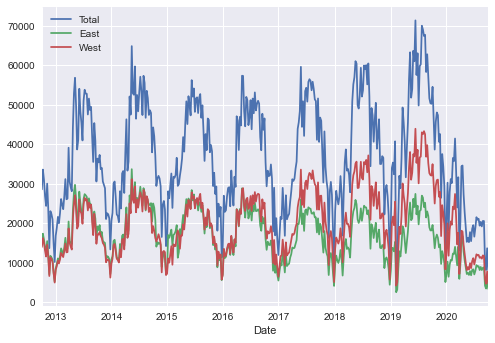

In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.colums = ['Total','East','West']
data.resample('W').sum().plot()

(0.0, 2514695.6)

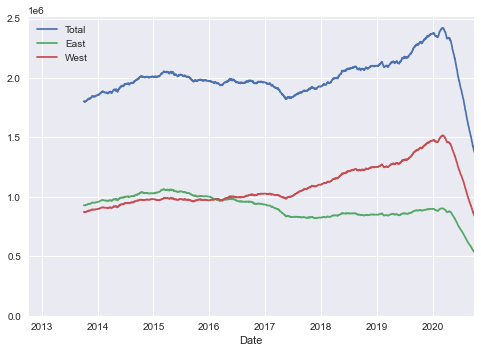

In [8]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

<AxesSubplot:xlabel='time'>

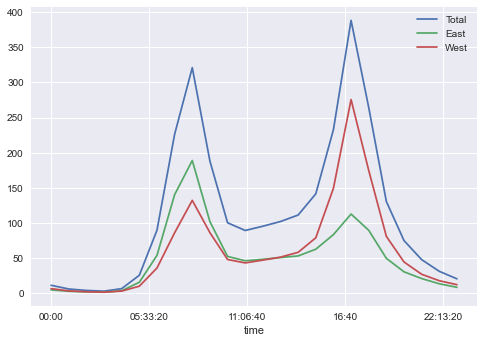

In [9]:
data.groupby(data.index.time).mean().plot()

In [10]:
pivoted = data.pivot_table('Total',index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<AxesSubplot:xlabel='time'>

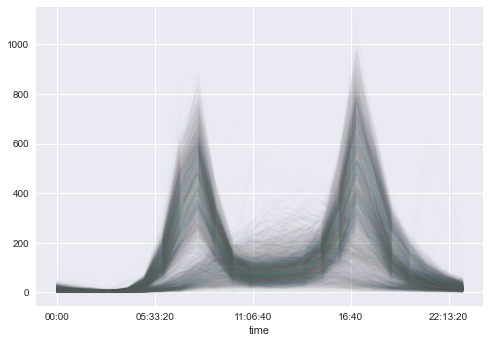

In [11]:
pivoted.plot(legend=False, alpha=0.01)